In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('NYC_Bicycle_Counts_2016_Corrected.csv', index_col=0, decimal=',')

data

,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Date,,,,,,,,,
1-Apr,Friday,78.1,66,0.01,1.704,3.126,4.115,2.552,11.497
2-Apr,Saturday,55,48.9,0.15,827.000,1.646,2.565,1.884,6.922
3-Apr,Sunday,39.9,34,0.09,526.000,1.232,1.695,1.306,4.759
4-Apr,Monday,44.1,33.1,0.47 (S),521.000,1.067,1.440,1.307,4.335
5-Apr,Tuesday,42.1,26.1,0,1.416,2.617,3.081,2.357,9.471
...,...,...,...,...,...,...,...,...,...
27-Oct,Thursday,54,41,1.41,651.000,1.558,2.137,1.902,6.248
28-Oct,Friday,46.9,44.1,0,2.021,3.872,4.271,3.202,13.366
29-Oct,Saturday,63,39,0,1.639,3.160,4.027,2.920,11.746


## Is the day of the week affects the number of bikes on the bridge?

In [3]:
#for d in data.Day.unique():
   # data[d] = [1 if day == d else 0 for day in data['Day']]
    
data['Weekend'] = [1 if day in ['Saturday', 'Sunday'] else 0 for day in data['Day']]


In [4]:
data

,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Weekend
Date,,,,,,,,,,
1-Apr,Friday,78.1,66,0.01,1.704,3.126,4.115,2.552,11.497,0
2-Apr,Saturday,55,48.9,0.15,827.000,1.646,2.565,1.884,6.922,1
3-Apr,Sunday,39.9,34,0.09,526.000,1.232,1.695,1.306,4.759,1
4-Apr,Monday,44.1,33.1,0.47 (S),521.000,1.067,1.440,1.307,4.335,0
5-Apr,Tuesday,42.1,26.1,0,1.416,2.617,3.081,2.357,9.471,0
...,...,...,...,...,...,...,...,...,...,...
27-Oct,Thursday,54,41,1.41,651.000,1.558,2.137,1.902,6.248,0
28-Oct,Friday,46.9,44.1,0,2.021,3.872,4.271,3.202,13.366,0
29-Oct,Saturday,63,39,0,1.639,3.160,4.027,2.920,11.746,1


In [5]:
# 1) reformat the variable for temperature and precipitation
data['Precipitation'] = data['Precipitation'].replace('0.47 (S)', 0.47)
data['Precipitation'] = data['Precipitation'].replace('T', 0)

convert_columns = ['High Temp (°F)', 'Low Temp (°F)', 'Precipitation']
for col in convert_columns:
    data[col] = data[col].astype('float')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 1-Apr to 31-Oct
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  214 non-null    object 
 1   High Temp (°F)       214 non-null    float64
 2   Low Temp (°F)        214 non-null    float64
 3   Precipitation        214 non-null    float64
 4   Brooklyn Bridge      214 non-null    float64
 5   Manhattan Bridge     214 non-null    float64
 6   Williamsburg Bridge  214 non-null    float64
 7   Queensboro Bridge    214 non-null    float64
 8   Total                214 non-null    float64
 9   Weekend              214 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 18.4+ KB
None


In [6]:
data['Temp_Diff'] = data['High Temp (°F)'] - data['Low Temp (°F)']
data['First_half_Bridges'] = data['Brooklyn Bridge'] + data['Manhattan Bridge']
data['Second_half_Bridges'] = data['Williamsburg Bridge'] + data['Queensboro Bridge']
data

,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Weekend,Temp_Diff,First_half_Bridges,Second_half_Bridges
Date,,,,,,,,,,,,,
1-Apr,Friday,78.1,66.0,0.01,1.704,3.126,4.115,2.552,11.497,0,12.1,4.830,6.667
2-Apr,Saturday,55.0,48.9,0.15,827.000,1.646,2.565,1.884,6.922,1,6.1,828.646,4.449
3-Apr,Sunday,39.9,34.0,0.09,526.000,1.232,1.695,1.306,4.759,1,5.9,527.232,3.001
4-Apr,Monday,44.1,33.1,0.47,521.000,1.067,1.440,1.307,4.335,0,11.0,522.067,2.747
5-Apr,Tuesday,42.1,26.1,0.00,1.416,2.617,3.081,2.357,9.471,0,16.0,4.033,5.438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27-Oct,Thursday,54.0,41.0,1.41,651.000,1.558,2.137,1.902,6.248,0,13.0,652.558,4.039
28-Oct,Friday,46.9,44.1,0.00,2.021,3.872,4.271,3.202,13.366,0,2.8,5.893,7.473
29-Oct,Saturday,63.0,39.0,0.00,1.639,3.160,4.027,2.920,11.746,1,24.0,4.799,6.947


In [7]:
weekday_total_bikes = data.groupby('Day'). sum().Total
weekday_total_bikes

Day
Friday       557.522
Monday       601.205
Saturday     465.020
Sunday       425.208
Thursday     623.439
Tuesday      623.468
Wednesday    672.668
Name: Total, dtype: float64

In [8]:
weekday_data = pd.DataFrame(weekday_total_bikes)
weekday_data

,Total
Day,
Friday,557.522
Monday,601.205
Saturday,465.020
Sunday,425.208
Thursday,623.439
Tuesday,623.468
Wednesday,672.668


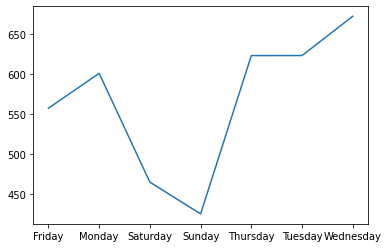

In [9]:
plt.plot(weekday_data)
plt.show()

## What affects the number of bikes on all the bridges and how?

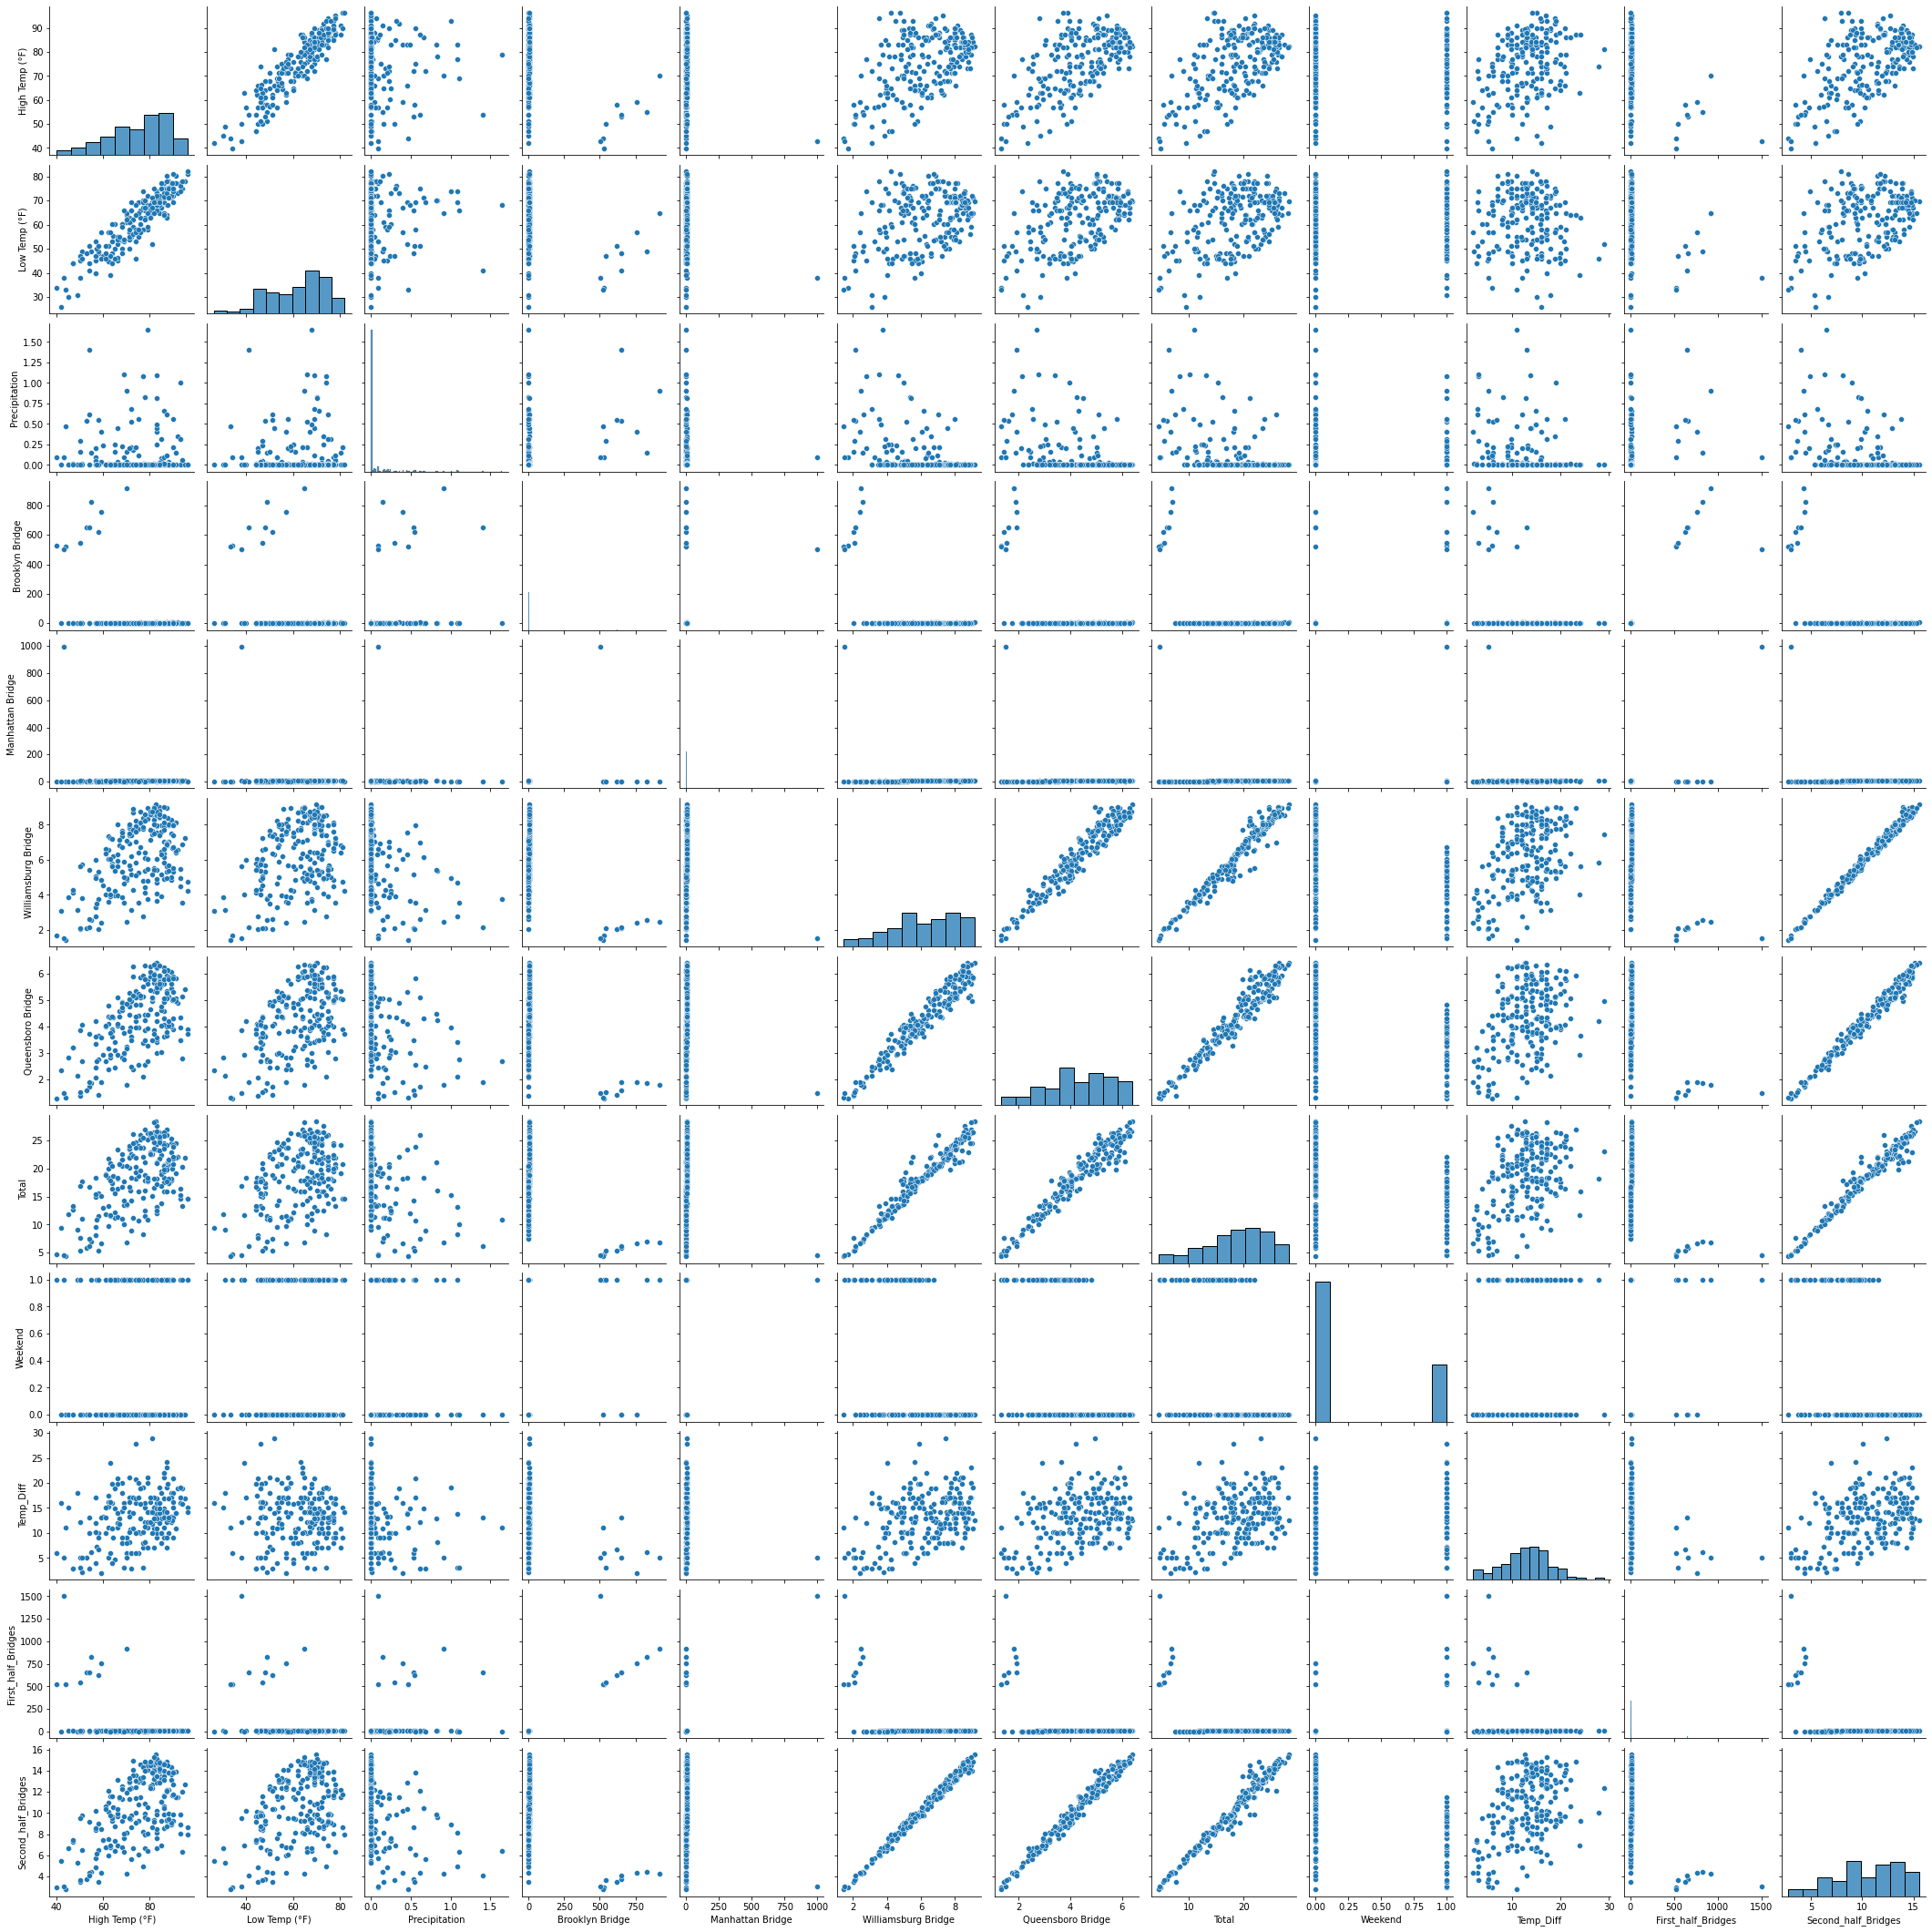

In [10]:
# scatter plots
sns.pairplot(data)

In [11]:
# correlation matrix
data.corr()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Weekend,Temp_Diff,First_half_Bridges,Second_half_Bridges
High Temp (°F),1.000000,0.917376,-0.052069,-0.356695,-0.163429,0.528813,0.618883,0.574179,-0.038259,0.368121,-0.362330,0.569362
Low Temp (°F),0.917376,1.000000,0.040390,-0.258188,-0.133582,0.397539,0.505758,0.442149,-0.038300,-0.032365,-0.268412,0.444262
Precipitation,-0.052069,0.040390,1.000000,0.338989,-0.015622,-0.423247,-0.388024,-0.420711,0.016600,-0.225103,0.275624,-0.412677
Brooklyn Bridge,-0.356695,-0.258188,0.338989,1.000000,0.219580,-0.454653,-0.450745,-0.478367,0.148516,-0.292573,0.919879,-0.456901
Manhattan Bridge,-0.163429,-0.133582,-0.015622,0.219580,1.000000,-0.145316,-0.131419,-0.145607,0.096973,-0.098342,0.584617,-0.140964
Williamsburg Bridge,0.528813,0.397539,-0.423247,-0.454653,-0.145316,1.000000,0.965399,0.975089,-0.527334,0.399259,-0.436510,0.994520
Queensboro Bridge,0.618883,0.505758,-0.388024,-0.450745,-0.131419,0.965399,1.000000,0.963180,-0.497630,0.372634,-0.427674,0.987373
Total,0.574179,0.442149,-0.420711,-0.478367,-0.145607,0.975089,0.963180,1.000000,-0.469957,0.408967,-0.456348,0.978497
Weekend,-0.038259,-0.038300,0.016600,0.148516,0.096973,-0.527334,-0.497630,-0.469957,1.000000,-0.006604,0.162491,-0.519850
Temp_Diff,0.368121,-0.032365,-0.225103,-0.292573,-0.098342,0.399259,0.372634,0.408967,-0.006604,1.000000,-0.282840,0.391935


***Multivariate regression***

<AxesSubplot:>

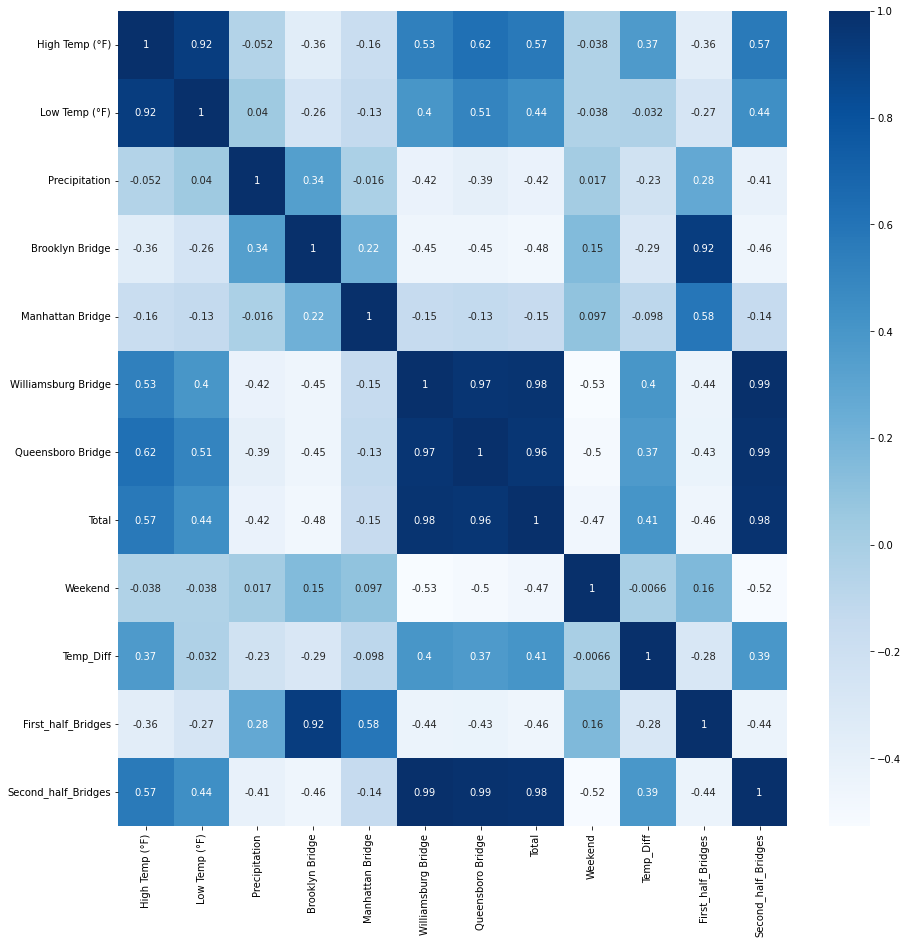

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
corr = data.corr()
sns.heatmap(corr, cmap='Blues', annot=True, ax=ax)

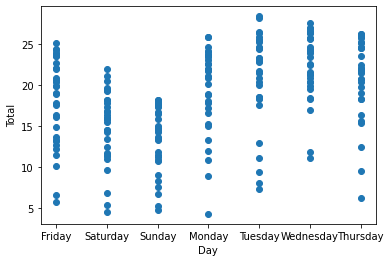

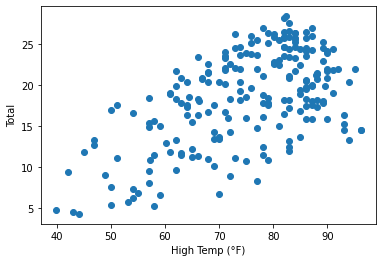

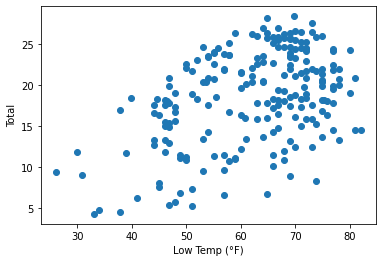

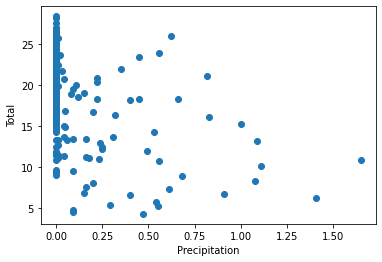

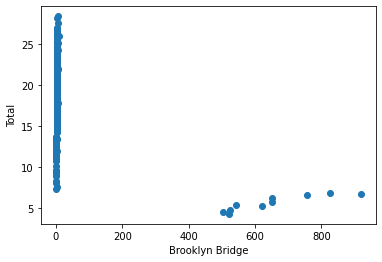

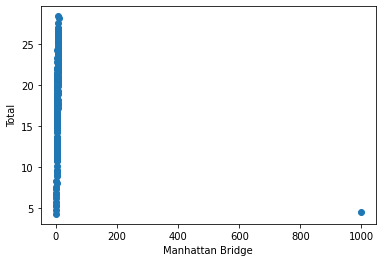

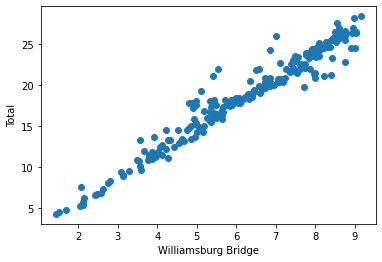

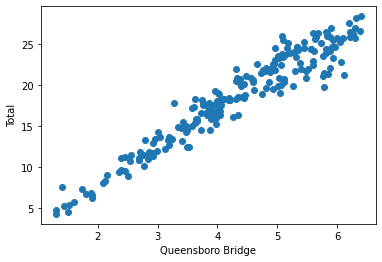

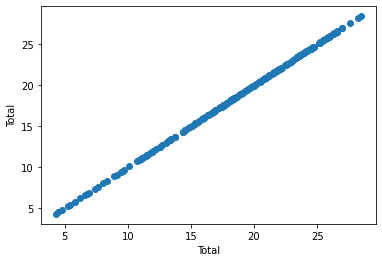

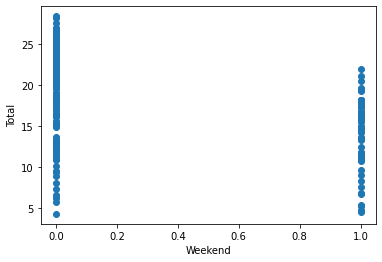

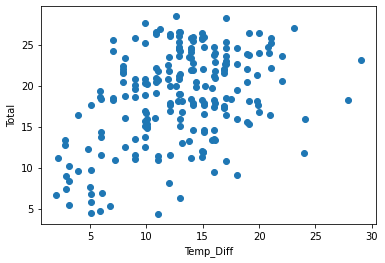

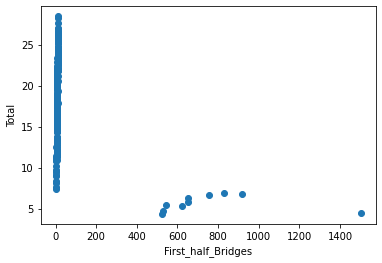

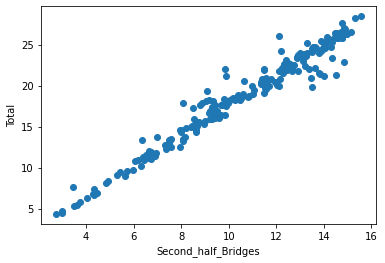

In [13]:
for i, col in enumerate(data.columns):
    plt.scatter(data[col], data['Total'])
    plt.xlabel(str(col))
    plt.ylabel('Total')
    plt.show()

### decide on different sets of variables you want to include
- High Temp
- Low Temp
- Precipitation

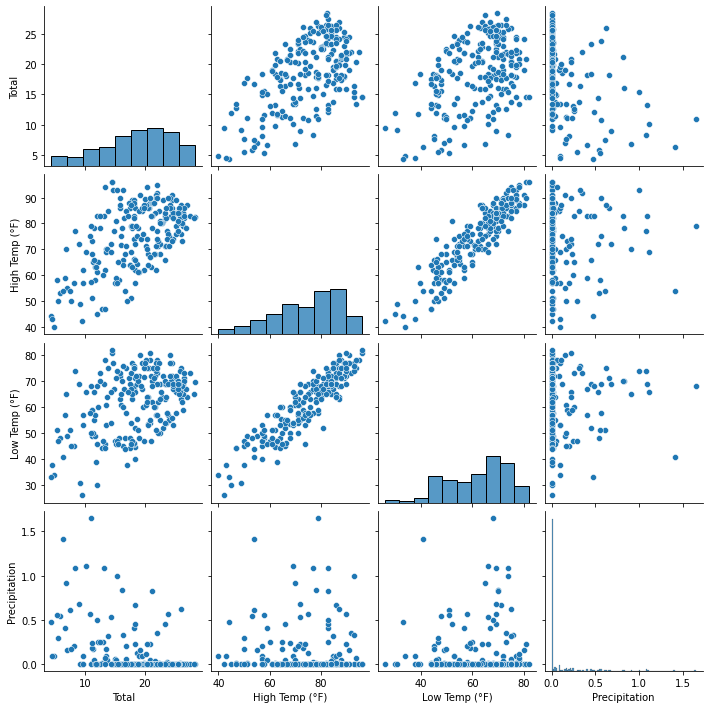

In [14]:
sns.pairplot(data[['Total', 'High Temp (°F)', 'Low Temp (°F)', 'Precipitation']])

In [15]:
print(np.corrcoef(data['High Temp (°F)'], data['Total'])[0,1])
print(np.corrcoef(data['Low Temp (°F)'], data['Total'])[0,1])
print(np.corrcoef(data['Precipitation'], data['Total'])[0,1])

0.5741789145258156
0.44214931454129525
-0.42071130875526325


### split the dataset into train and test

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

First of all, lets split the dataset into Train and Test to have some extra data that the model was not trained on. We will use this data to check model perfomance.

In [17]:
X = data[['High Temp (°F)', 'Low Temp (°F)', 'Precipitation']]
y = data['Total']

X.shape, len(y)

((214, 3), 214)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, len(y_test), len(y_train)

((171, 3), (43, 3), 43, 171)

###  try out training different models 

(e.g. multivariate linear regression with variables: [High, Low, Precipitation], [Low, Precipitation, Weekend], ..., also decision trees with different depth) 

Lets now train our first candidate model!

In [19]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [20]:
X.columns

Index(['High Temp (°F)', 'Low Temp (°F)', 'Precipitation'], dtype='object')

In [21]:
reg1.coef_  # the change in the independent variable for the unit change in the independent variable.

array([ 0.38008778, -0.17704175, -8.68158726])

In [22]:
y_pred_train = reg1.predict(X_train)

In [23]:
r2_score(y_train, y_pred_train)

0.467951755197086

In [24]:
y_pred_test = reg1.predict(X_test)

In [25]:
r2_score(y_test, y_pred_test)

0.5750174641749828

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
print(mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train, squared=False), mean_squared_error(y_test, y_pred_test, squared=False))

3.3727491063104535 3.659965447470768
16.038709048392104 17.49837931722809
4.004835708039982 4.183106419543745


- Kui test on  parem, kui treening - underfitting
- Kui treening on parem kui test - overfitting

***We have UNDERFITTING data model***

In [28]:
X_1= data[['High Temp (°F)', 'Precipitation', 'Weekend', 'Temp_Diff']]
y_1 = data['Total']

X.shape, len(y)

((214, 3), 214)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=21)
X_train.shape, X_test.shape, len(y_test), len(y_train)

((171, 4), (43, 4), 43, 171)

In [30]:
reg2 = LinearRegression()
reg2.fit(X_train, y_train)

LinearRegression()

In [31]:
X_1.columns

Index(['High Temp (°F)', 'Precipitation', 'Weekend', 'Temp_Diff'], dtype='object')

In [32]:
reg2.coef_ # if temp goes higher 1 F, then number of bikes increase 0.2198...*1000 (2198)
# if outside has more rainfall then the number of bikes decreases -7.6096...*1000 (76097)

array([ 0.21985715, -7.60969775, -5.54408916,  0.18755388])

In [33]:
y_pred_train = reg2.predict(X_train)
y_pred_test = reg2.predict(X_test)

In [34]:
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.6855619495459817
0.7148237410167403


In [35]:
print(mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train, squared=False), mean_squared_error(y_test, y_pred_test, squared=False))

2.5056124104799267 2.2923146808345645
10.297248715771907 7.961051783951974
3.208932644318342 2.8215335872450593


In [36]:
data

,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Weekend,Temp_Diff,First_half_Bridges,Second_half_Bridges
Date,,,,,,,,,,,,,
1-Apr,Friday,78.1,66.0,0.01,1.704,3.126,4.115,2.552,11.497,0,12.1,4.830,6.667
2-Apr,Saturday,55.0,48.9,0.15,827.000,1.646,2.565,1.884,6.922,1,6.1,828.646,4.449
3-Apr,Sunday,39.9,34.0,0.09,526.000,1.232,1.695,1.306,4.759,1,5.9,527.232,3.001
4-Apr,Monday,44.1,33.1,0.47,521.000,1.067,1.440,1.307,4.335,0,11.0,522.067,2.747
5-Apr,Tuesday,42.1,26.1,0.00,1.416,2.617,3.081,2.357,9.471,0,16.0,4.033,5.438
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27-Oct,Thursday,54.0,41.0,1.41,651.000,1.558,2.137,1.902,6.248,0,13.0,652.558,4.039
28-Oct,Friday,46.9,44.1,0.00,2.021,3.872,4.271,3.202,13.366,0,2.8,5.893,7.473
29-Oct,Saturday,63.0,39.0,0.00,1.639,3.160,4.027,2.920,11.746,1,24.0,4.799,6.947


Brooklyn and Manhattan Bridges (First half of Bridges) dosen't have any good dependent values.

In [45]:
X_2= data[['High Temp (°F)', 'Precipitation', 'Weekend']]
y_2= data['Second_half_Bridges']

X.shape, len(y)

((214, 3), 214)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=21)
X_train.shape, X_test.shape, len(y_test), len(y_train)

((171, 3), (43, 3), 43, 171)

In [47]:
reg3 = LinearRegression()
reg3.fit(X_train, y_train)

LinearRegression()

In [48]:
X_2.columns

Index(['High Temp (°F)', 'Precipitation', 'Weekend'], dtype='object')

In [49]:
reg3.coef_

array([ 0.13328354, -4.51219862, -3.32750721])

In [50]:
y_pred_train = reg3.predict(X_train)
y_pred_test = reg3.predict(X_test)

In [51]:
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

0.7111745055006841
0.6942073741617321


In [53]:
print(mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train, squared=False), mean_squared_error(y_test, y_pred_test, squared=False))

1.3212719667174924 1.3603782968496367
2.827971101236401 2.786538972462727
1.6816572484416676 1.6692929558536833


***We have OVERFITTING model***

In [56]:
data.describe()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Weekend,Temp_Diff,First_half_Bridges,Second_half_Bridges
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,74.933645,61.972430,0.109065,33.467523,9.706453,6.160874,4.300724,18.544533,0.289720,12.961215,43.173977,10.461598
std,12.545418,11.670566,0.259959,140.310572,67.828743,1.910643,1.260986,5.702084,0.454696,4.995955,168.722629,3.145235
min,39.900000,26.100000,0.000000,1.045000,1.067000,1.440000,1.306000,4.335000,0.000000,2.000000,3.045000,2.747000
25%,66.050000,53.225000,0.000000,2.580500,3.744500,4.884500,3.495750,14.825750,0.000000,9.900000,6.705000,8.410500
50%,78.100000,64.900000,0.000000,3.196000,5.160500,6.334500,4.342500,19.001500,0.000000,13.000000,8.570000,10.591000
75%,84.900000,71.100000,0.047500,3.917750,6.645250,7.858000,5.308500,23.253500,1.000000,16.100000,10.628750,13.172500
max,96.100000,82.000000,1.650000,918.000000,997.000000,9.148000,6.392000,28.437000,1.000000,29.000000,1501.000000,15.540000
